In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("homeprices_banglore.csv")
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [4]:
from sklearn import preprocessing 

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

X_scaled = sx.fit_transform(df.drop('price',axis=1))
Y_scaled = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))


In [5]:
X_scaled

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [9]:
Y_scaled = Y_scaled.reshape(20,)

In [12]:
X_scaled.shape

(20, 2)

In [26]:
def batch_GD(x,y,epochs,learning_rate=0.01):

    features = x.shape[1]
    w = np.ones(shape = (features,))
    b = 0 
    n = x.shape[0]

    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
    
        y_predicted = np.dot(w,x.T) + b
        
        w_grad = -(2/n)*(x.T.dot(y-y_predicted))
        b_grad = -(2/n)*np.sum(y-y_predicted)

        w = w - w_grad*learning_rate
        b = b - b_grad*learning_rate

        cost = np.mean(np.square(y-y_predicted))

        if i%10 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list
            


In [27]:
w, b, cost, cost_list, epoch_list = batch_GD(X_scaled,Y_scaled.reshape(Y_scaled.shape[0],),500)
w, b, cost

(array([0.70712464, 0.67456527]),
 np.float64(-0.23034857438407427),
 np.float64(0.0068641890429808105))

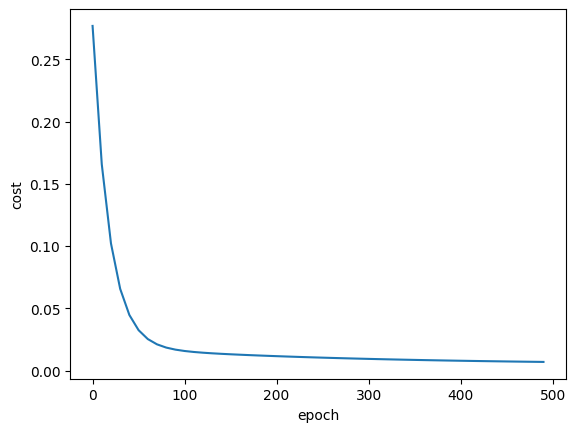

In [28]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [51]:
import random

def SGD(x,y,epochs,learning_rate=0.01):

    features = x.shape[1]
    w = np.ones(shape = (features,))
    b = 0 
    n = x.shape[0]

    cost_list = []
    epoch_list = []
    
    for i in range(epochs):

        k = random.randint(0,n-1)
        sample_x = x[k]
        sample_y = y[k]
        
        y_predicted = np.dot(w,sample_x.T) + b

        cost = np.square(sample_y-y_predicted)

        w_grad = -(2/n)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/n)*np.sum(sample_y-y_predicted)

        w = w - w_grad*learning_rate
        b = b - b_grad*learning_rate

        if i%10 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
   
    return w, b, cost, cost_list, epoch_list
            


In [52]:
w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = SGD(X_scaled,Y_scaled.reshape(Y_scaled.shape[0],),10000)
w_sgd, b_sgd, cost_sgd

(array([0.70846859, 0.67169964]),
 np.float64(-0.23258291961750197),
 np.float64(0.011619875651140652))

In [53]:
w,b

(array([0.70712464, 0.67456527]), np.float64(-0.23034857438407427))

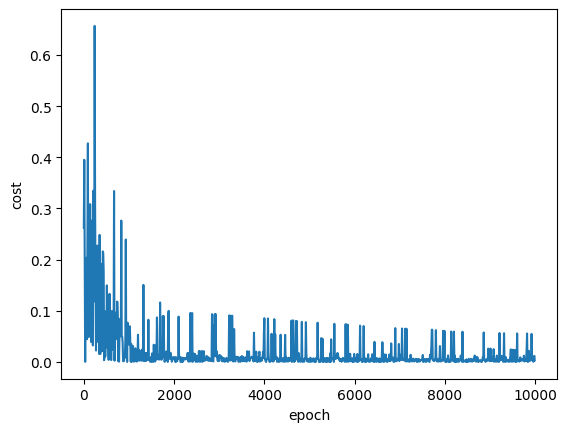

In [54]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)

In [63]:
X_scaled.shape

(20, 2)

In [89]:
def mini_batch_gd(x,y,epochs,batch_size=5,learning_rate=0.01):
    
    features = x.shape[1]
    w = np.ones(shape = (features,))
    b = 0 
    n = x.shape[0]

    cost_list = []
    epoch_list = []
    
    for i in range(epochs):

        s = random.randint(0,n-2)
        e = s+batch_size

        sample_x = x[s:e]
        sample_y = y[s:e]

        y_predicted = np.dot(w,sample_x.T) + b

        cost = np.mean(np.square(sample_y-y_predicted))

        w_grad = -(2/n)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/n)*np.sum(sample_y-y_predicted)

        w = w - w_grad*learning_rate
        b = b - b_grad*learning_rate

        if i%10 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
   
    return w, b, cost, cost_list, epoch_list

        

In [90]:
w_mbgd, b_mbgd, cost_mbgd, cost_list_mbgd, epoch_list_mbgd = mini_batch_gd(X_scaled,Y_scaled.reshape(Y_scaled.shape[0],),2200)

In [91]:
w_mbgd, b_mbgd, cost_mbgd

(array([0.70625628, 0.67719544]),
 np.float64(-0.23266717036385567),
 np.float64(0.014680558639832591))

In [79]:
w,b

(array([0.70712464, 0.67456527]), np.float64(-0.23034857438407427))

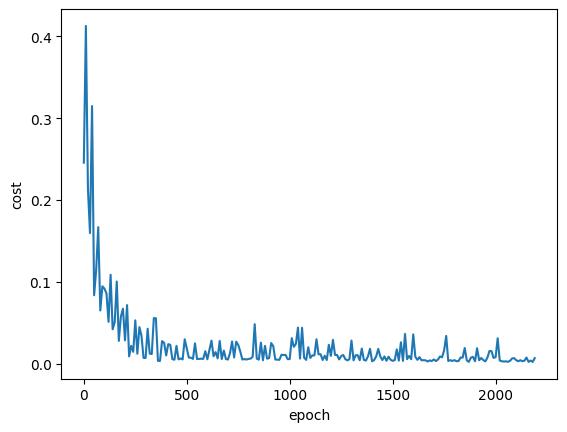

In [92]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_mbgd,cost_list_mbgd)